# Multiplex Markov Chains
### Dane Taylor June, 2020

In [1]:
%pylab inline 
import networkx as nx
from numpy import *
from scipy.linalg import block_diag
from scipy import sparse
import matplotlib.colors as colors

# these scripts contain the fucntions for MMCs
from MMC_util import *
from MMC_plot_util import *

Populating the interactive namespace from numpy and matplotlib


# Make example 2-layer multiplex network

In [2]:
I = 2 # number of layers
N = 11 # number of nodes
As = [undirected_chain(N),star(N)]# Intralayer adjacency matrices

a = 1# tunes heterogeniety of interlayer Markov chains
Pts = get_increasing_Pts(I,a,N)# Interlayer transition matrices
#Pts = get_random_Pts(a,N) #Pts = get_decreasing_Pts(a,N)
At = Pts[0]

alpha = 1#page_rank teleportation parameter
#plot_rank(As)

//anaconda3/envs/datascience/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


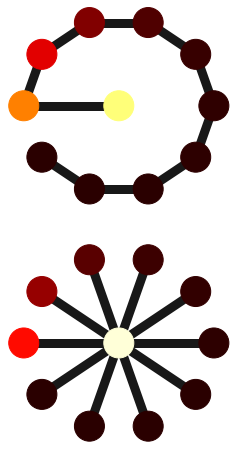

In [3]:
w = .5
x2 = supraCentrality(As,Pts,w,alpha)
plot_rank(As,x2,vmin=.02,vmax=.25)
plt.savefig('figs/net2.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)

total imbalance = 0.029720884163967724


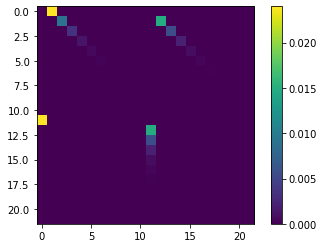

In [4]:
F,pos_DF,Delta,total_imbalance = study_imbalance(As,Pts,w,alpha)
plt.imshow(pos_DF)
plt.colorbar()
print('total imbalance = '+str(total_imbalance))

In [5]:
# F,pos_DF,Delta,total_imbalance = study_imbalance(As,Pts,w,alpha)
# plt.imshow(pos_DF)#,cmap='copper')
# plt.colorbar()
# print('total imbalance = '+str(total_imbalance))

# Make a colorbar for figure

In [6]:
# plt.scatter(np.arange(len(x2.T.flatten())),np.arange(len(x2.T.flatten())),c=list(x2.T.flatten()) ,cmap = 'hot')
# cbar = plt.colorbar()
# cbar.ax.set_ylabel('stationary distribution, $\pi_n^{(i)}(\omega)$')
# plt.savefig('figs/colorbar.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)

### Confirm accuracy of approximations

* Strong coupling limit

\begin{align}\label{eq:lim0}
\lim_{\omega\to0} { {\pi}}_n^{(i)}(\omega)  &=   \tilde{\alpha}_{i} v_n^{(i)}
\end{align}
where
$ \tilde{{\bf \alpha}} = [\tilde{\alpha}_1,\dots,\tilde{\alpha}_N]$ is the dominant left eigenvector (i.e., stationary distribution) of a matrix $\tilde{{\bf  X}} $ with entries $\tilde{X}_{ij}= \sum_n {v}_n^{(i)} \tilde{ {\bf P}}^{(n)}$.

* Weak coupling limit

\begin{align}
\lim_{\omega\to1} { {\pi}}_n^{(i)}(\omega)  &= {\alpha}_{n}   \tilde{v}_{i}^{(n)}   
\label{eq:lim1}
\end{align}

where ${\bf \alpha}=[\alpha_1,\dots,\alpha_N] $ is the dominant left eigenvector of a transition matrix ${\bf X}$ with entries 
% average of the intralayer transition matrices 
$ X_{nm} = \sum_i   \tilde{v}_{i}^{(n)} {P}_{nm}^{(i)} $.


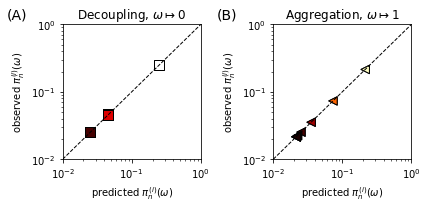

In [7]:
w_small,w_large = 0.001,0.999
results = make_asym_fig('figs/asym.pdf',[w_small,w_large],As,Pts,alpha,vmin=.02,vmax=.25)    

## Sec. IV - Optimality of MMCs

In [8]:
a_s =  [.99,.9,.5,.1,.01]
funs = [get_chain_Pts,get_increasing_Pts,get_decreasing_Pts,get_random_Pts]
ws = linspace(.0001,.9999,31)
convs,tots,imb_opts,conv_opts = get_optimal_curves(ws,a_s,funs,As,alpha)

/Users/drt/Desktop/Dropbox/Research Ongoing/Graph Structures/graph centrality/Centrality/personal/6 Multiplex Markov Chains/CODE/multiplexMarkovChains/MMC_plot_util.py:189: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


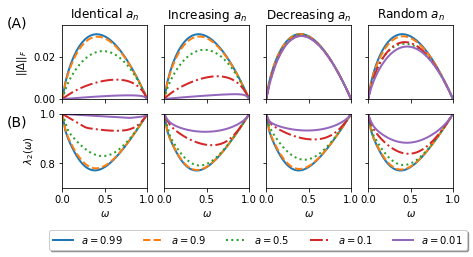

In [9]:
exp_names = ['Identical $a_n$','Increasing $a_n$','Decreasing $a_n$','Random $a_n$']
f1,ax2,ax2 = plot_optimals(ws,a_s,funs,convs,tots,exp_names)
plt.legend(['$a='+str(a)+'$' for a in a_s],loc='lower center',bbox_to_anchor=(-1.3, -0.9), shadow=True, ncol=len(a_s));
plt.savefig('figs/optimality_curves.pdf')

## Study the two optima for different values of a

In [10]:
a_s2 = linspace(.05,.95,20)
a_s2 = [float(z) for z in a_s2]
ws = linspace(.0001,.9999,201)
convs,tots,imb_opts,conv_opts = get_optimal_curves(ws,a_s2,funs,As,alpha)

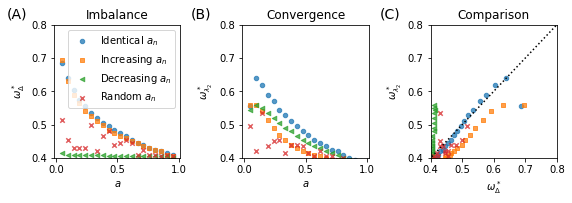

In [11]:
plot_optimals_SM(a_s2,imb_opts,conv_opts,exp_names)
plt.savefig('compare_optima.pdf')

In [12]:
Pts = get_increasing_Pts(I,1,N)
F,pos_DF,Delta,total_imbalance = study_imbalance(As,Pts,w=0.5,alpha=alpha)

In [13]:
def create_2layer_pos(N,dy,dtheta):    
    pos = {}
    pos[0]  = np.array([0,0])
    for i in range(1,N):
        theta = (2*pi*(i-1) ) / (N-1)
        pos[i] = np.array([-np.cos(theta+dtheta),2*np.sin(theta+dtheta)])
    pos[11]  = np.array([0,dy])    
    for i in range(1,N):
        theta = (2*pi*(i-1) ) / (N-1)
        pos[i+N] = np.array([-np.cos(theta+dtheta),dy+2*np.sin(theta+dtheta)])
    return pos

def sketch_intralayer_edges(G,pos,intralayer_edgelists,line_specs=[1,'k','dotted',.5]):
    for edgelist in intralayer_edgelists:
        nx.draw_networkx_edges(G,pos,edgelist=edgelist,with_labels=False,
            width=line_specs[0],edge_color=line_specs[1],style=line_specs[2],alpha=line_specs[3])
    
def get_edges_and_weights(X):#get edge list and edge weights from a sparse matrix
    X = F
    edge_weights = list(X[np.nonzero(X)])
    ids = argsort(edge_weights)
    edge_weights = list(sort(edge_weights))

    edge_list = array(np.nonzero(X)).T
    edge_list = edge_list[ids]
    edge_list = [tuple(sort(e)) for e in edge_list]
    return edge_list, edge_weights
    
def norm_cmap(x,vmin,vmax):
    return (log(x) - log(vmin) ) / ( log(vmax) -  log(vmin) )

def get_intralayer_edge_list(As):
    intralayer_edges = []
    N = len(As[0])
    for i,A in enumerate(As):
        intralayer_edges.append([ tuple(i*N +e) for e in array(where(A)).T ]) 
    return intralayer_edges

def plot_imbalance(file_name,
                   weights,
                   As,
                   pos,
                   cmap=plt.cm.Blues,
                   vmin=0,
                   vmax=.02,
                   node_size=300,
                   node_colors='#A0CBE2',                   
                   edge_width=10,
                   sketch_intralayers=True):
    
    f1 = figure(figsize = (4,5))
    
    ordered_edges,colors = get_edges_and_weights(weights)        
    intralayer_edges = get_intralayer_edge_list(As)
    #interlayer_edges = [ (i,i+N) for i in range(N)]    

    # visualize network with networkx
    G = nx.from_numpy_matrix(weights)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
    
    
    if sketch_intralayers: 
        sketch_intralayer_edges(G,pos,intralayer_edges)
    
    nx.draw_networkx_nodes(G,
                           pos,
                           node_color=node_colors,
                           node_size=node_size,
                           with_labels=False, 
                           vmin=vmin, 
                           vmax=vmax,
                           alpha=.8,
                           cmap=sm)

    ax = plt.gca()
    ax.collections[0].set_edgecolor("#FFFFFF")
    ax.collections[0].set_linewidths(0.5)


    nx.draw_networkx_edges(G, 
                           pos,  
                           edgelist = ordered_edges, 
                           width=colors/np.max(colors)*edge_width, 
                           edge_cmap=cmap,        
                           with_labels=False, 
                           vmin=vmin, 
                           vmax=vmax,
                           alpha=1,
                           edge_color=colors,
                           cmap=sm)
    
    cbar = plt.colorbar(sm)
    cbar.ax.set_ylabel('net flow, $\Delta_{pq}$')
    limits = plt.axis('off')

    plt.savefig(file_name,transparent=True, bbox_inches='tight', pad_inches=0)

    return

//anaconda3/envs/datascience/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
//anaconda3/envs/datascience/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
//anaconda3/envs/datascience/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


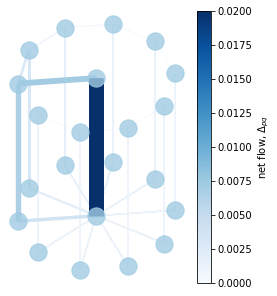

In [14]:
file_name = 'figs/imbalance.pdf'
pos = create_2layer_pos(N,-5,dtheta = -.1)
plot_imbalance(file_name,               
               Delta,
               As,
               pos,
               sketch_intralayers=True,
               vmax=.02,
               edge_width=15
              )

In [15]:
def visualize_2layer_multiplex(node_specs,
                               intralayer_edge_specs,
                               interlayer_edge_specs,
                               #file_name,
                               cbar_label,
                               vmin,
                               vmax):
    
    
    f1 = figure(figsize = (4,5))
    G = nx.from_numpy_matrix(pos_DF>0)

    #draw nodes
    nx.draw_networkx_nodes(G,
                           node_specs['pos'],
                           node_color = node_specs['node_color'],
                           node_size = node_specs['node_size'],
                           with_labels = False, 
                           vmin = vmin, 
                           vmax = vmax,
                           alpha = node_specs['alpha'],
                           cmap = node_specs['cmap']
                          );
    ax= plt.gca()
    ax.collections[0].set_edgecolor("#000000")
    ax.collections[0].set_linewidths(0.5)
    
    
    #draw intralayer edges
    for t in range(len(As)):
        nx.draw_networkx_edges(G, 
                               node_specs['pos'],  
                               edgelist = interlayer_edge_specs['edgelists'],
                               width = interlayer_edge_specs['width'], 
                               alpha = interlayer_edge_specs['alpha'],
                               edge_color = interlayer_edge_specs['colors'],
                               style = interlayer_edge_specs['style'],
                               cmap = node_specs['cmap']
                              );


    #draw interlayer edges
    for t in range(len(As)):
        nx.draw_networkx_edges(G, 
                               node_specs['pos'],  
                               edgelist = intralayer_edge_specs[t]['edgelists'],
                               cmap = node_specs['cmap']
                               #width = intralayer_edge_specs[t]['width'], 
                               #alpha = intralayer_edge_specs[t]['alpha'],
                               #edge_color = intralayer_edge_specs[t]['colors'],
                               #style = intralayer_edge_specs[t]['style']
                              );


    def norm_cmap(x,vmin,vmax):
        return 1*(log(x) - log(vmin) ) / ( log(vmax) -  log(vmin) )

    #sm = plt.cm.ScalarMappable(cmap=node_specs['cmap'], norm=colors.LogNorm(vmin=vmin, vmax=vmax))
    sm = plt.cm.ScalarMappable(cmap=node_specs['cmap'], norm=plt.Normalize(vmin=vmin,vmax=vmax))
    cbar = plt.colorbar(sm)
    cbar.ax.set_ylabel(cbar_label)
    limits = plt.axis('off')

    #plt.savefig(file_name,transparent=True, bbox_inches='tight', pad_inches=0)

    return f1


In [16]:
cmap = plt.cm.get_cmap('hot')
node_specs = {'pos':pos,
              'node_size':300,
              'node_color':cmap(norm_cmap(x2.T.flatten(),.025,.25)),
              'alpha':1,
              'cmap':cmap,
             }

intralayer_edge_specs = []
for t in range(len(As)):
    intralayer_edge_specs.append({'edgelists':get_intralayer_edge_list(As)[t],
                                 'width':4,
                                 'colors':'k',
                                 'cmap':cmap,
                                 'alpha':1,
                                 'style':'-'
                                })

interlayer_edge_specs = {'edgelists':[(i,i+N) for i in range(N)],
                                 'width':10,
                                 'colors':'k',
                                 'cmap':cmap,
                                 'alpha':.12,
                                 'style':'-'
                                }

//anaconda3/envs/datascience/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


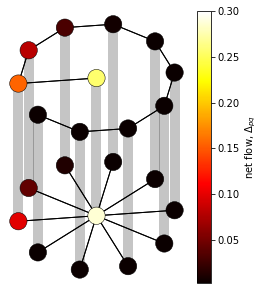

In [17]:
f1 = visualize_2layer_multiplex(node_specs,
                           intralayer_edge_specs,
                           interlayer_edge_specs,
                           #file_name = 'figs/2layer_new.pdf',
                           cbar_label = 'net flow, $\Delta_{pq}$',
                           vmin = 0.003,
                           vmax = .3
                          )
plt.savefig('figs/2layer_new.pdf',transparent=True, bbox_inches='tight', pad_inches=0)

In [18]:
inter_mask = (1-build_block_diag([ones(shape(As[0]),dtype=bool) for i in range(len(As))]))

edge_list, edge_weights = get_edges_and_weights(pos_DF*inter_mask)
    


node_specs = {'pos':pos,'node_size':300,'node_color':'#A0CBE2','alpha':1,'cmap':plt.cm.Blues}

intralayer_edge_specs = []
for t in range(len(As)):
    intralayer_edge_specs.append({'edgelists':get_intralayer_edge_list(As)[t],
                                 'width':4,
                                 'colors':edge_weights[0],
                                 'cmap':plt.cm.Blues,
                                 'alpha':.5,
                                 'style':'-.'
                                })

interlayer_edge_specs = {'edgelists':[(i,i+N) for i in range(N)],
                                 'width':10,
                                 'colors':'k',
                                 'cmap':plt.cm.Blues,
                                 'alpha':.12,
                                 'style':'-'
                                }

//anaconda3/envs/datascience/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


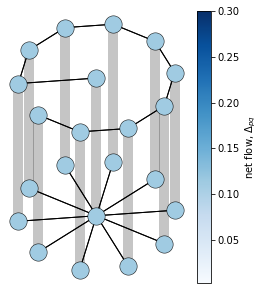

In [19]:
f1 = visualize_2layer_multiplex(node_specs,
                           intralayer_edge_specs,
                           interlayer_edge_specs,
                           #file_name = 'figs/2layer_new.pdf',
                           cbar_label = 'net flow, $\Delta_{pq}$',
                           vmin = 0.003,
                           vmax = .3
                          );



In [20]:
interlayer_edge_specs['edge_list']

KeyError: 'edge_list'

## Visualize stationary distribution as curves

In [ ]:
ws2 = linspace(.01,.99,21)
ws2 = [float(w) for w in ws2]
Pearsons,tots,boo1,boo2 = compare_d_Delta(As,Pts,ws2,alpha);

In [ ]:
plot_Delta_Curves(ws2,boo1,boo2)
plt.savefig('delta_curves.pdf')

In [ ]:
a = 1
ws = [.01,.1,.5,.9]
Pts = get_chain_Pts(I,a,N)
f4, ax = plot_stationary_curves(x2,As,Pts,ws,alpha)
plt.savefig('stationary_curves.pdf')